In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
correlations = data.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


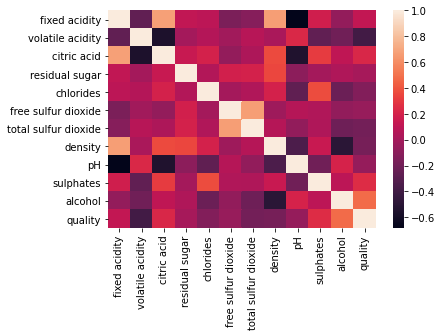

In [5]:
sns.heatmap(data.corr())
plt.show()

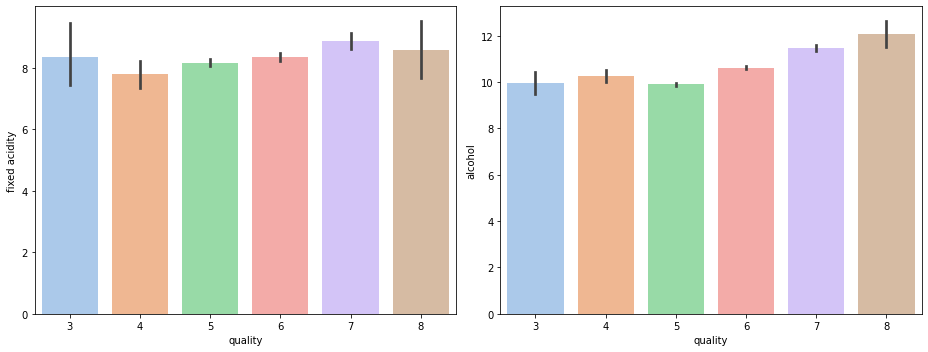

In [6]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(x='quality',y='fixed acidity',data=data,palette='pastel')
plt.subplot(1,2,2)
sns.barplot(x='quality', y='alcohol', data=data, palette='pastel')
plt.tight_layout()

In [7]:
data['quality']= [1 if i >6.5 else 0 for i in data['quality']]
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [8]:
data['zscore']= ((data['citric acid'] - data['citric acid'].mean())/data['citric acid'].std())

In [9]:
filt = np.abs(data['zscore'])<3
data = data[filt]

In [10]:
data['zscore2']= ((data['alcohol'] - data['alcohol'].mean())/data['alcohol'].std())
filt = np.abs(data['zscore2'])<3
data = data[filt]
data['zscore3']=((data['total sulfur dioxide']-data['total sulfur dioxide'].mean())/data['total sulfur dioxide'].std())
filt=np.abs(data['zscore3'])<3
data=data[filt]

In [11]:
X= data.drop(['quality','zscore','zscore2','zscore3'], axis=1)
y=data['quality']

In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1575, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 41)

In [15]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
x_train = scaling.fit_transform(X_train)
x_test = scaling.fit_transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)
a = model.score(x_test,y_test)
a

0.8984126984126984

In [18]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
b = model.score(x_test,y_test)
b

0.8666666666666667

In [19]:
model = SVC()
model.fit(x_train,y_train)
c = model.score(x_test,y_test)
c

0.9079365079365079

In [20]:
for i in range(1,40):
    model=KNeighborsClassifier( n_neighbors=i,metric='manhattan')
    model.fit(x_train,y_train)
    print(i+model.score(x_test,y_test))

1.892063492063492
2.895238095238095
3.907936507936508
4.898412698412699
5.898412698412699
6.8920634920634924
7.901587301587302
8.911111111111111
9.907936507936508
10.904761904761905
11.907936507936508
12.898412698412699
13.901587301587302
14.901587301587302
15.904761904761905
16.901587301587302
17.901587301587302
18.8984126984127
19.892063492063492
20.88888888888889
21.892063492063492
22.88888888888889
23.892063492063492
24.895238095238096
25.88888888888889
26.892063492063492
27.88888888888889
28.892063492063492
29.892063492063492
30.892063492063492
31.892063492063492
32.888888888888886
33.89206349206349
34.888888888888886
35.89206349206349
36.89206349206349
37.8984126984127
38.89523809523809
39.89523809523809


In [21]:
kmodel=KNeighborsClassifier( n_neighbors=8,metric='manhattan')
kmodel.fit(x_train,y_train)
d = kmodel.score(x_test,y_test)
d

0.9111111111111111